In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.metrics import pairwise_distances
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture

In [7]:
data=pd.read_csv('mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
#let's check the dimensions of data
data.shape

(1453, 15)

In [4]:
# columns of data
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [74]:
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [60]:
MD_x = data.iloc[:, :11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = np.round(np.mean(MD_x, axis=0), 2)

col_means

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [11]:
# Perform PCA on the binary matrix
pca = PCA()
MD_pca = pca.fit(MD_x)

In [12]:
# Get the explained variance and cumulative proportion
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [13]:
# Create a summary with the standard deviation, explained variance, and cumulative variance
standard_deviation = np.sqrt(pca.explained_variance_)
proportion_of_variance = explained_variance
cumulative_proportion = cumulative_variance

In [27]:
index=[]
for i in range(len(standard_deviation)):
    i=i+1
    index.append('PCA{}'.format(i))
summary = pd.DataFrame({
    'Standard Deviation': np.round(standard_deviation, 4),
    'Proportion of Variance': np.round(proportion_of_variance, 4),
    'Cumulative Proportion': np.round(cumulative_proportion, 4)
},index=index)

summary

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PCA1,0.7570,0.2994,0.2994
PCA2,0.6075,0.1928,0.4922
PCA3,0.5046,0.1330,0.6253
PCA4,0.3988,0.0831,0.7084
PCA5,0.3374,0.0595,0.7679
PCA6,0.3103,0.0503,0.8182
PCA7,0.2897,0.0438,0.8620
PCA8,0.2751,0.0395,0.9016
PCA9,0.2653,0.0368,0.9383
PCA10,0.2488,0.0324,0.9707


In [ ]:
"""
Results from principal components analysis indicate that the first two components
capture about 50% of the information contained in the segmentation variables. The
following command returns the factor loadings:
"""

In [15]:
# Print the standard deviations (square root of explained variances)
print("Standard Deviation(1, .., p=11):")
print(np.round(standard_deviation, 1))

Standard Deviation(1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [16]:
# Get the rotation matrix (loadings of the original variables on the PCs)
rotation_matrix = pca.components_.T

# Feature names as in the R output
feature_names = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create a DataFrame for better display
rotation_df = pd.DataFrame(np.round(rotation_matrix, 3), 
                           index=feature_names, 
                           columns=[f'PC{i+1}' for i in range(rotation_matrix.shape[1])])

# Display the rotation matrix
print("\nRotation (n x k):")
print(rotation_df)


Rotation (n x k):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110  0.045  
co

In [17]:
# Project the data onto the first two principal components
projected_data = pca.transform(MD_x)

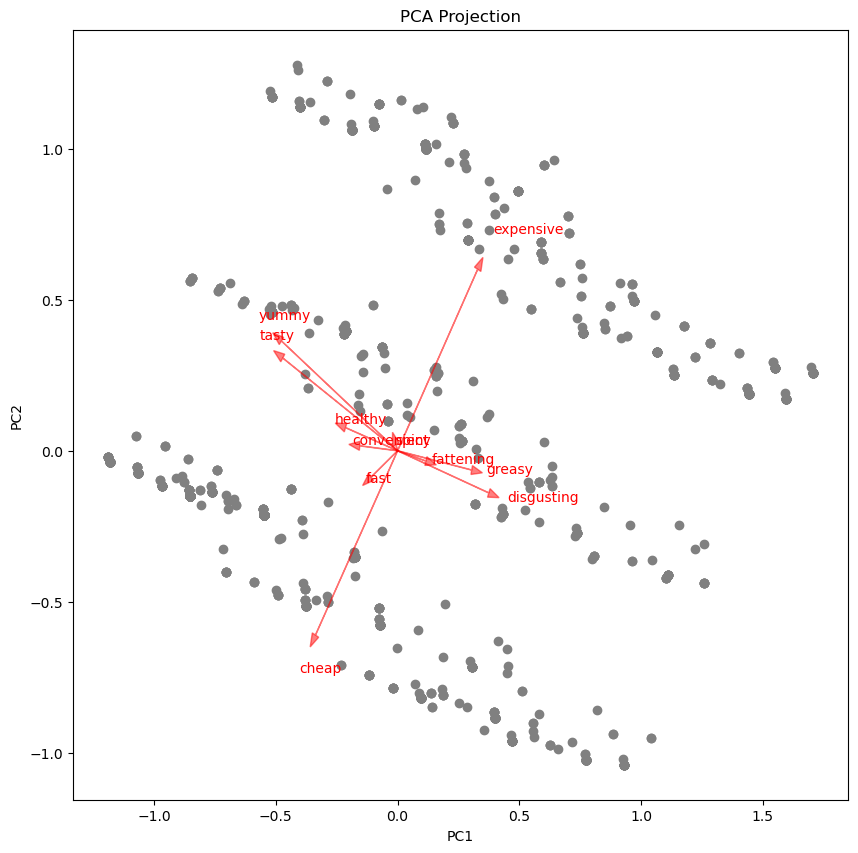

In [21]:
# Plot the projected data (first two principal components)
plt.figure(figsize=(10,10))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(len(feature_names)):
    plt.arrow(0, 0, rotation_matrix[i, 0], rotation_matrix[i, 1], 
              color='r', alpha=0.5, head_width=0.03)
    plt.text(rotation_matrix[i, 0]*1.2, rotation_matrix[i, 1]*1.2, 
             feature_names[i], color='r')


plt.show()

#### Principal components analysis of the fast food data set

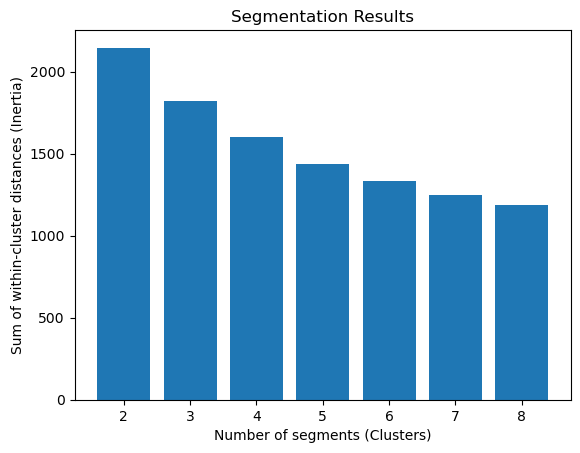

In [90]:
np.random.seed(1234)
nrep = 10

# Define number of clusters (segments)
num_segments = range(2, 9)  # Starting from 2 since 1 cluster is trivial
within_cluster_distances = []
MD_km28 = {}

# Perform KMeans for each number of segments
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)  # Assuming MD_x is the data matrix
    within_cluster_distances.append(kmeans.inertia_)  # Sum of within-cluster distances
    MD_km28[str(k)] = kmeans

# Plot the results
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments (Clusters)")
plt.ylabel("Sum of within-cluster distances (Inertia)")
plt.title("Segmentation Results")

plt.show()

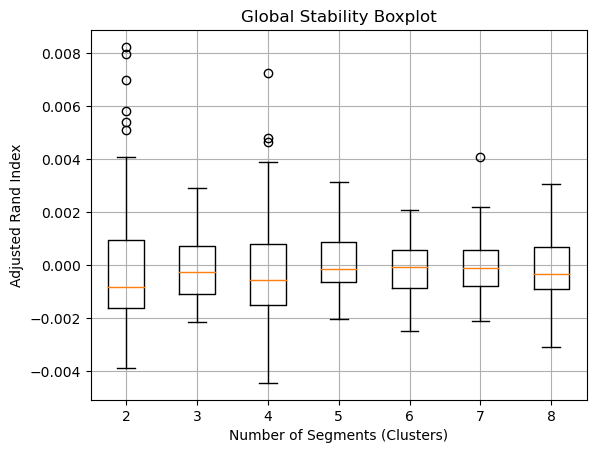

In [76]:
# Set seed for reproducibility
np.random.seed(1234)

# Data already exists as MD_x from previous steps
n_bootstraps = 100
n_reps = 10
cluster_range = range(2, 9)
bootstrap_ari = {k: [] for k in cluster_range}

# Bootstrapping and KMeans clustering
for k in cluster_range:
    for i in range(n_bootstraps):
        # Bootstrap sample from the data
        MD_x_boot = resample(MD_x, random_state=np.random.randint(0, 10000))

        # Perform KMeans clustering multiple times for stability (n_init = 10)
        kmeans = KMeans(n_clusters=k, n_init=n_reps, random_state=1234)
        kmeans.fit(MD_x_boot)

        # Assign labels for the original and the bootstrap sample
        original_kmeans = KMeans(n_clusters=k, n_init=n_reps, random_state=1234).fit(MD_x)
        boot_labels = kmeans.labels_
        original_labels = original_kmeans.labels_

        # Calculate Adjusted Rand Index (ARI) between bootstrap and original clustering
        ari = adjusted_rand_score(original_labels, boot_labels)
        bootstrap_ari[k].append(ari)

# Create a boxplot of ARI values
plt.boxplot([bootstrap_ari[k] for k in cluster_range], labels=cluster_range)
plt.title('Global Stability Boxplot')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.show()

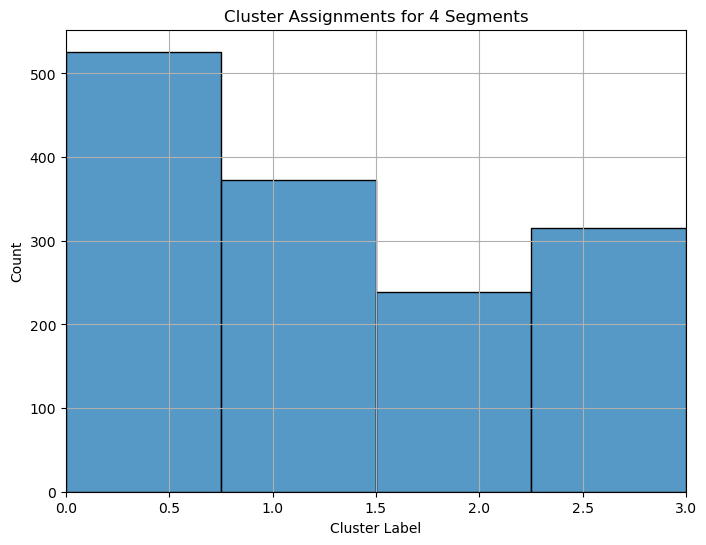

In [23]:
# Perform KMeans clustering for 4 clusters (equivalent to MD.km28[["4"]] in R)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)

# Cluster labels for each data point
cluster_labels = kmeans.labels_

# Plot the histogram of cluster assignments
plt.figure(figsize=(8, 6))
sns.histplot(cluster_labels, bins=4, kde=False)
plt.xlim(0, 3)  # Limit the x-axis to the cluster range (0 to 3 for 4 clusters)
plt.title('Cluster Assignments for 4 Segments')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

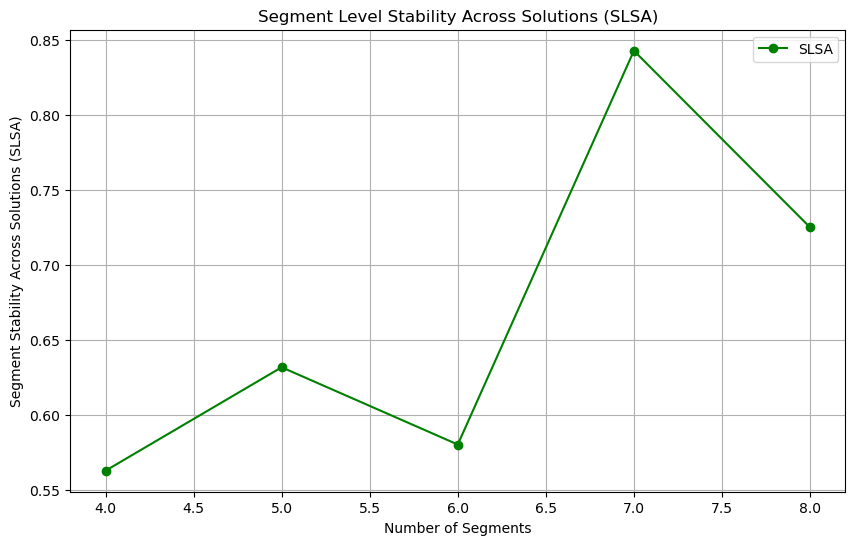

In [143]:
# Number of segments to test
num_segments = range(2, 9)  # testing for 2 to 8 segments

# Dictionary to store cluster labels for each number of segments
cluster_labels = {}

# Fit KMeans for different segment numbers
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    cluster_labels[k] = kmeans.labels_

# Now let's calculate SLSA: Segment Level Stability Across Solutions
# Compare the cluster labels across different segmentations

slsa_values = []

for k in range(3, len(num_segments) + 1):
    prev_labels = cluster_labels[k - 1]
    current_labels = cluster_labels[k]
    
    # Use adjusted Rand index to measure similarity between the two segmentations
    similarity = adjusted_rand_score(prev_labels, current_labels)
    slsa_values.append(similarity)

# Plot SLSA values
plt.figure(figsize=(10, 6))
plt.plot(num_segments[2:], slsa_values, marker='o', color='green', label="SLSA")
plt.xlabel('Number of Segments')
plt.ylabel('Segment Stability Across Solutions (SLSA)')
plt.title('Segment Level Stability Across Solutions (SLSA)')
plt.grid(True)
plt.legend()
plt.show()


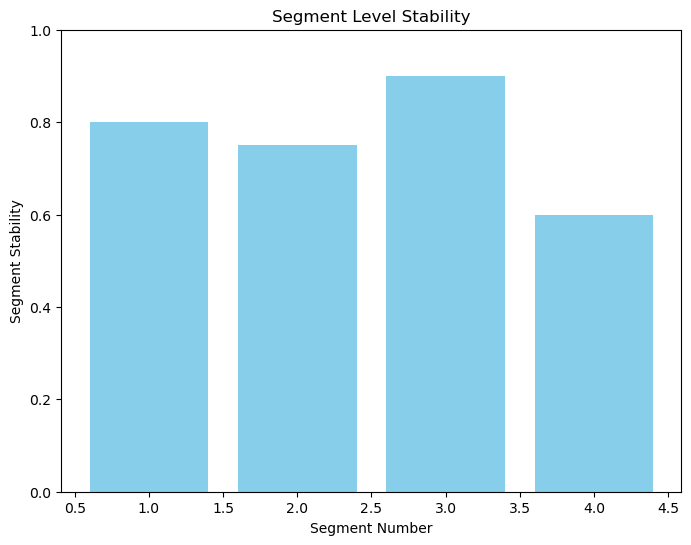

In [100]:
# Assuming MD_r4 contains segment stability values for each segment (as calculated earlier)
MD_r4 = np.array([0.8, 0.75, 0.9, 0.6])  # Example data, replace with actual segment stability values

# Plotting the segment stability
plt.figure(figsize=(8, 6))

# Create a bar plot for each segment
segment_numbers = range(1, len(MD_r4) + 1)
plt.bar(segment_numbers, MD_r4, color='skyblue')

# Set y-axis limits from 0 to 1 as in the R code
plt.ylim(0, 1)

# Add labels and title
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Level Stability")

plt.show()

In [107]:
np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1    18       True  3   3 -1819.760124  3645.520247  3661.364404  3660.283376
2    13       True  4   4 -1603.020916  3214.041831  3235.167374  3233.822143
3    10       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.896202  2675.792404  2707.480718  2705.715191
5    10       True  7   7 -1247.102133  2508.204266  2545.173966  2543.249651
6    11       True  8   8 -1186.873546  2389.747091  2431.998177  2429.996533


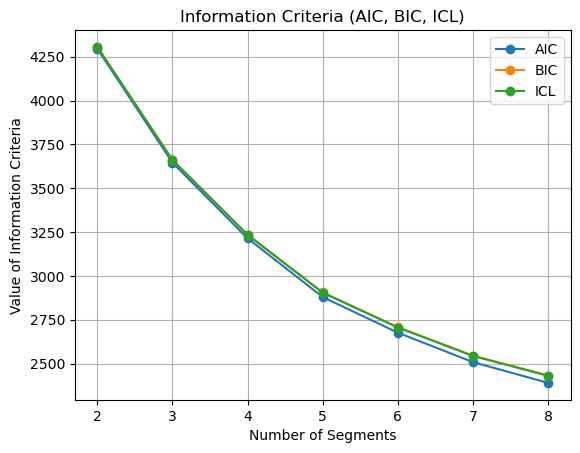

In [108]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [115]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 4.871454541903527
Log-likelihood for MD.m4: 11.938484365626355


In [116]:
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)


-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [117]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)

 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [118]:
from patsy import dmatrices

independent_vars = data.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [119]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


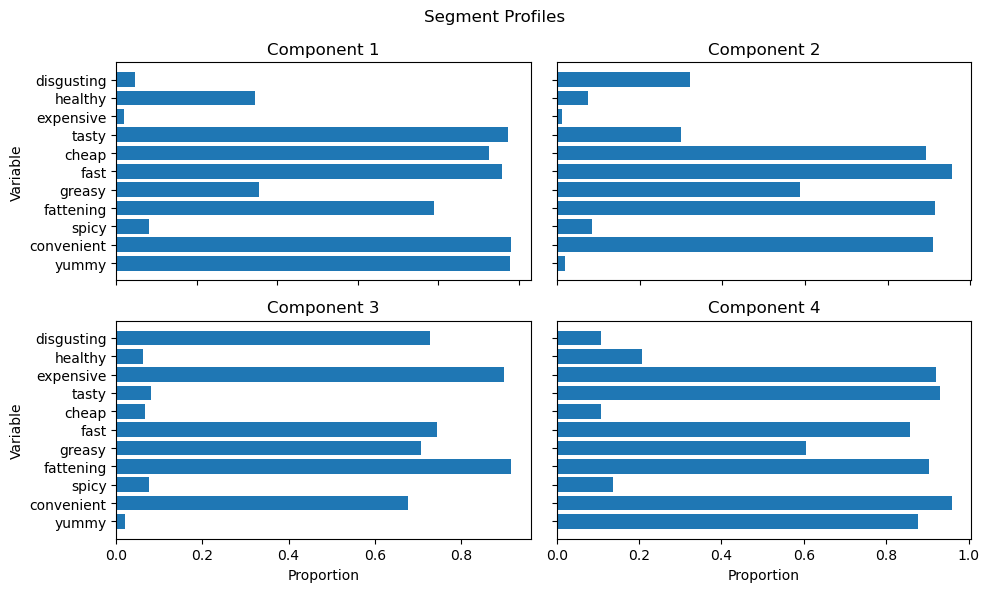

In [120]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

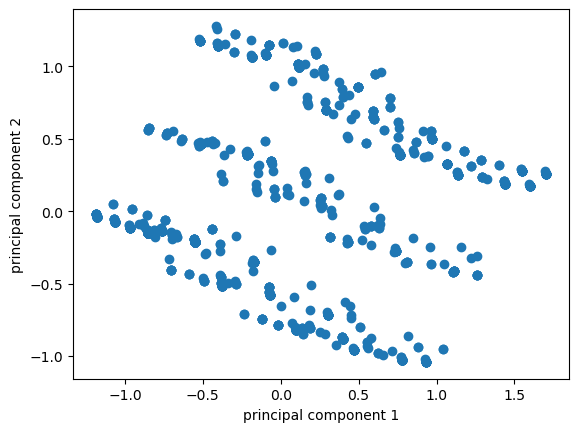

In [121]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

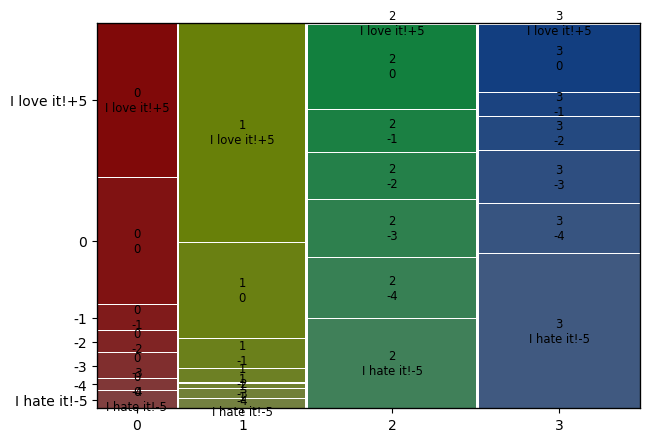

In [133]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data
df_eleven = data.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(data['cluster_num'],data['Like'])
#Reordering cols
data
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','I love it!+5']]
crosstab 
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

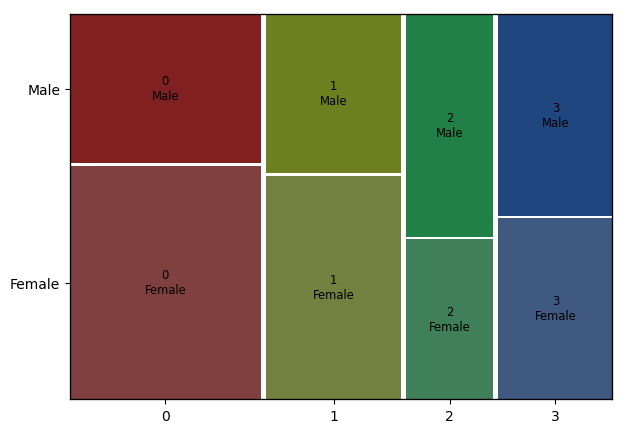

In [134]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()


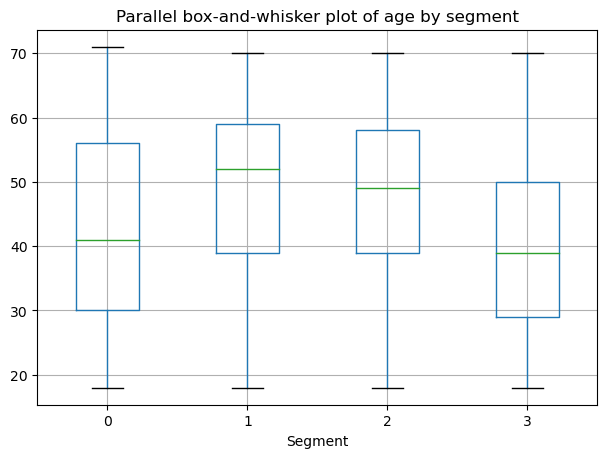

In [142]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [137]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [138]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [139]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


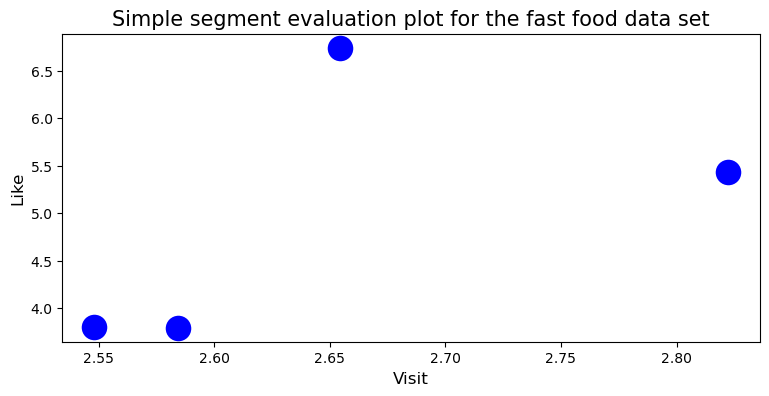

In [141]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="b")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()